# Analyzing Amazon Alexa Reviews using NLP
## MIS 753
### Murilo Gustineli
### Dr. Gregory Moody
### Spring 2020

<img src="https://propelyourcompany.com/wp-content/uploads/amazon-alexa-logo.png" width="700px">

**Importing libraries that will be used**

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for providing the path
import os
print(os.listdir('C:/Users/muril/Documents/UNLV - MIS/MIS 753 - Independent Study/Amazon Alexa/'))

['.ipynb_checkpoints', 'amazon_alexa.tsv', 'amazon_alexa_NLP.ipynb']


**Reading the data**

In [2]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

# getting the shape of the data
data.shape

(3150, 5)

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# describing the data set
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<img src="https://cdn.dribbble.com/users/16630/screenshots/3910913/echo_lightring_400x300.gif" width="500px">

In [5]:
# checking if there are any null values in the dataset
data.isnull().any().any()

False

**Describing the data according to the length of the reviews**

In [6]:
# adding a length column for analyzing the length of the reviews
data['length'] = data['verified_reviews'].apply(len)
data.groupby('length').describe().sample(10)

rating                                                feedback  \
        count      mean       std  min   25%  50%   75%  max    count   
length                                                                  
137       8.0  4.625000  1.060660  2.0  5.00  5.0  5.00  5.0      8.0   
159       6.0  3.833333  1.471960  2.0  2.50  4.5  5.00  5.0      6.0   
76       11.0  3.909091  1.375103  1.0  3.50  4.0  5.00  5.0     11.0   
684       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
722       1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0      1.0   
241       2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0      2.0   
39       27.0  4.777778  0.506370  3.0  5.00  5.0  5.00  5.0     27.0   
17       25.0  4.240000  1.331666  1.0  4.00  5.0  5.00  5.0     25.0   
272       5.0  4.400000  0.547723  4.0  4.00  4.0  5.00  5.0      5.0   
246       3.0  3.666667  2.309401  1.0  3.00  5.0  5.00  5.0      3.0   

                                                      
            mean       std  min   25%  50%  75%  max  
length                                                
137     0.875000  0.353553  0.0  1.00  1.0  1.0  1.0  
159     0.666667  0.516398  0.0  0.25  1.0  1.0  1.0  
76      0.818182  0.404520  0.0  1.00  1.0  1.0  1.0  
684     1.000000       NaN  1.0  1.00  1.0  1.0  1.0  
722     0.000000       NaN  0.0  0.00  0.0  0.0  0.0  
241     1.000000  0.000000  1.0  1.00  1.0  1.0  1.0  
39      1.000000  0.000000  1.0  1.00  1.0  1.0  1.0  
17      0.880000  0.331662  0.0  1.00  1.0  1.0  1.0  
272     1.000000  0.000000  1.0  1.00  1.0  1.0  1.0  
246     0.666667  0.577350  0.0  0.50  1.0  1.0  1.0

**Describing the data according to the ratings**

In [7]:
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

**Describing the data according to the feedback**

In [8]:
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

# Data Visualizations

**Distribution of Ratings for Alexa**

In [9]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

> By looking at the pie chart above, we can conclude that most of the ratings are positive for alexa. 72.6% customers have given Alexa a 5 star rating. 14.4% customers have given Alexa a 4 Star rating. That means that 87% of the customers have given alexa at least a good rating.
>> 4.38% of customers have given Alexa a rating of 3 stars. 3.05% of customers appear to not like Alexa as much as the other customers and chose to give only a 2-star rating to Alexa, whereas 5.11% people did not like Alexa and decided to give only 1-star rating. This feedback shows a total of 8.16% of the customers were not satisfied with Alexa.
>>>Overall, the ratings feedback is very positive, showing almost 90% of the customers being very satisfied with the product.


**Distribution of Variations in Alexa**

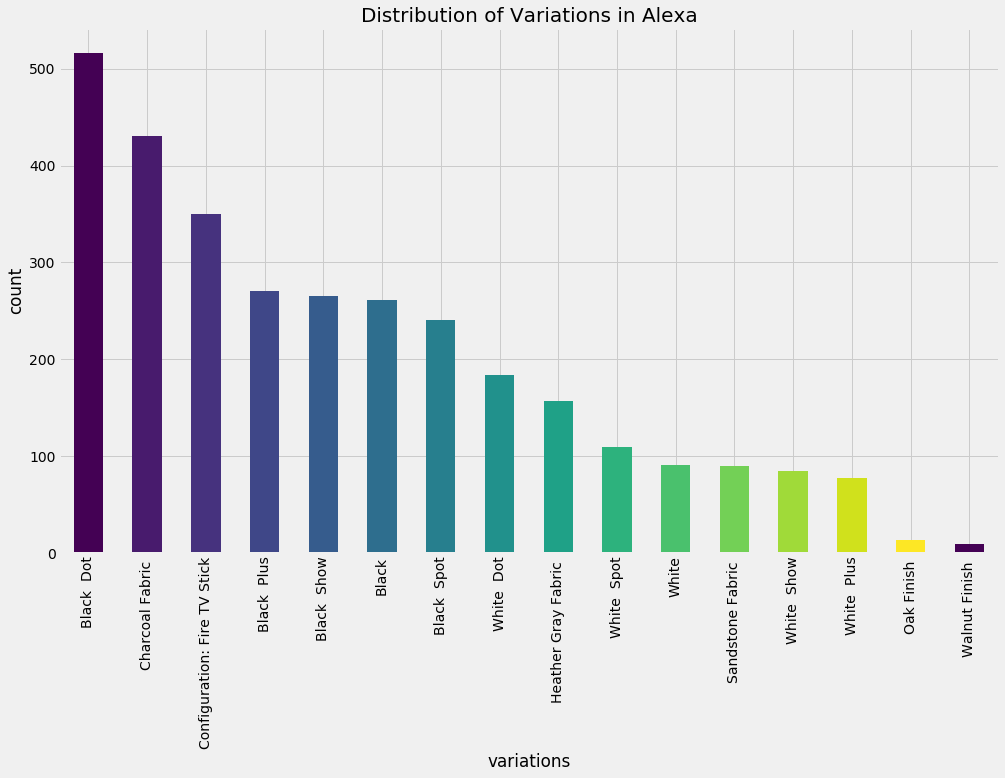

In [10]:
color = plt.cm.viridis(np.linspace(0, 1, 15))
data['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

>One of the columns in our dataset is called “variations”. The bar chart shows all the different variations of Amazon’s Alexa and their popularity as well. We see that there are 16 different variations of Alexa models. It goes from Black Dot all the way to Walnut Finish. It is clear that Black Dot is the most popular variation of Alexa with more than 500 units out of the 3150 samples in the dataset.
>>Black Dot, Charcoal Fabric and Configuration: Fire TV Stick are the most popular models of Amazon’s Alexa.
>>Oak Finish and Walnut Finish are the least popular variations


**Distribution of feedbacks for Alexa**

In [11]:
feedbacks = data['feedback'].value_counts()
label_feedback = feedbacks.index
size_feedback = feedbacks.values
colors = ['darkblue', 'aqua']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df2 = [feedback_piechart]
layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')
fig = go.Figure(data = df2,
                 layout = layout)
py.iplot(fig)

> This pie chart represents the distribution feedback for Amazon’s Alexa. 91.8% of customers have given a positive feedback for Alexa (3 stars or above), and only 8% of customers have given a negative feedback to Alexa (2 stars or below). 
>> This confirms that Alexa is has a very positive feedback from the majority of its customers, and only a small percentage did not like the product.

**Distribution of length in reviews**

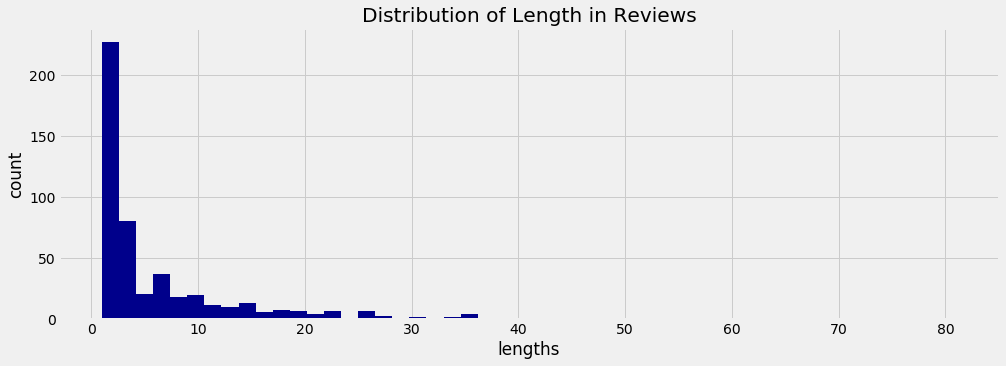

In [12]:
data['length'].value_counts().plot.hist(color = 'darkblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

> The above Distribution Plot shows the distribution of the length of the reviews written by the customers. This shows what is the average of the length of the reviews written by the customers of Amazon's Alexa. Most of the Reviews are very short, written in less than 3 words total. We can see that most customers write reviews that are between 5 to 20 words long. 
>> Very few customers write reviews that are longer than 30 words.

**Variation vs Ratings**

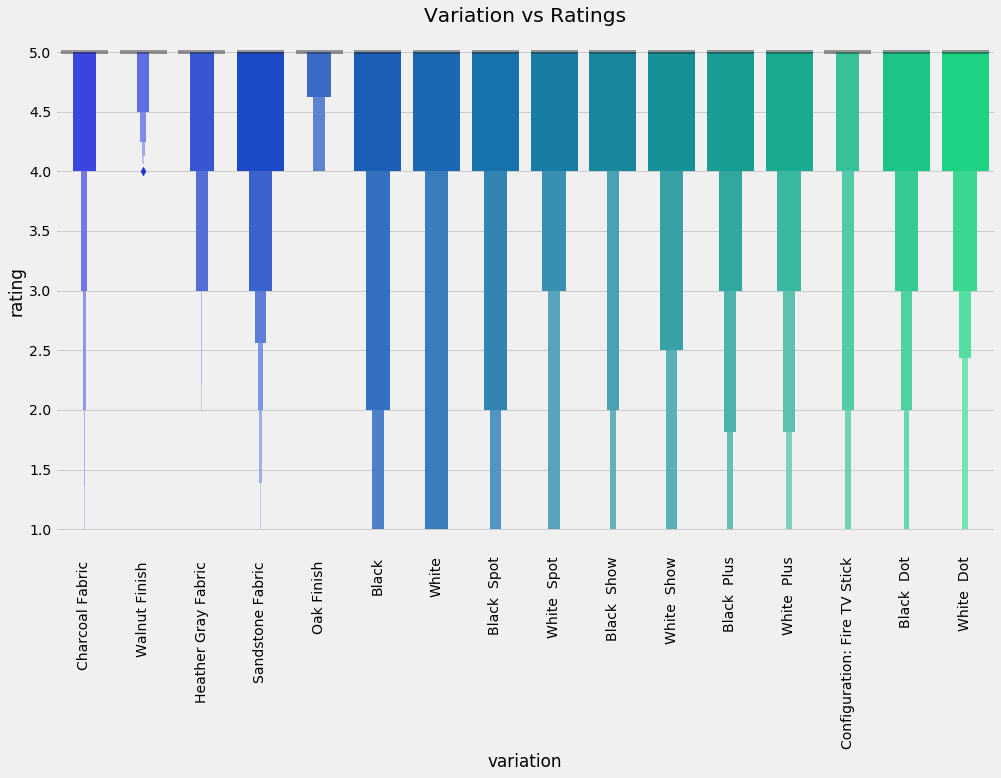

In [13]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['variation'], data['rating'], palette = 'winter')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

> I will be using Matplotlib and Seaborn to make a Bivariate plot in order to analyze the differences between “variations” and “ratings” of Amazon’s Alexa. I am using a Bivariate plot because I am dealing with two variables (variations and ratings).
We can draw very interesting conclusions from this plot.
>> Even though Walnut Finish and Oak Finish were the least popular variations of Alexa according to #10, they have very high ratings ranging from 4.5 to 5 stars. It shows that these Alexa variations are not very common among its customers, however, they have very positive ratings.
>>> The darker variations of Alexa, such as the Black variation model, have some negative ratings. We can infer this conclusion because of its popularity among the different Alexa model variations. Thus, due to the majority of customers owning this variation, it will have some negative reviews, even though most of them are positive.
>>>> The White model besides being one of the least popular variation models according to #10, it is also one of the models that have the most negative ratings. We can see that there is a substantial number of ratings below 3 stars for the White model, especially below 2 stars.


**Variation vs Length of Ratings**

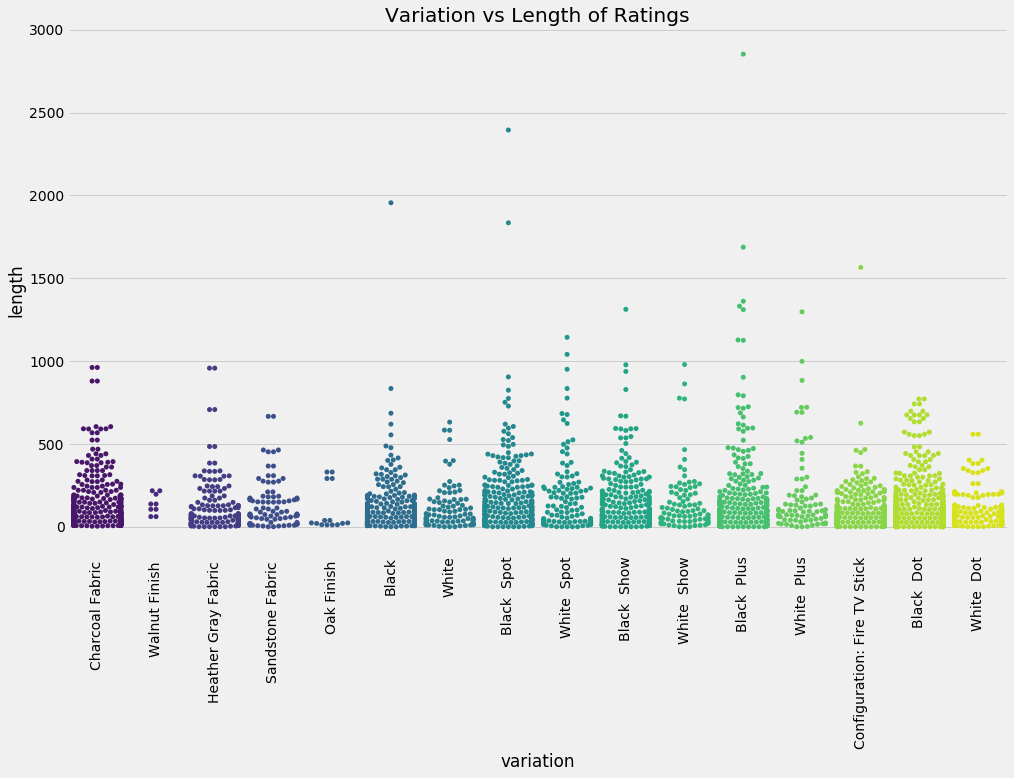

In [14]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.swarmplot(data['variation'], data['length'], palette = 'viridis')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)
plt.show()

> The Bivariate plot above shows the swarmplot between “variation” and “length” of Amazon’s Alexa reviews. In this case, we are looking for which model variation of Alexa’s customers have written the longest and shortest reviews. 
>> By looking at the graph, we can spot that the longest reviews were written by customers who own the Black Plus model, with the longest reviews with almost 3 thousand characters (including white space). 
>>> Dissatisfied customers usually tend to leave long reviews explaining their reasons for not liking the product. Based on that, I was hoping to see long reviews for the White model since the ratings were low in this particular model accordingly with the previous graph. However, that was not the case. The reviews for the White model were relatively short when compared with other models.


**Feedback vs Ratings**

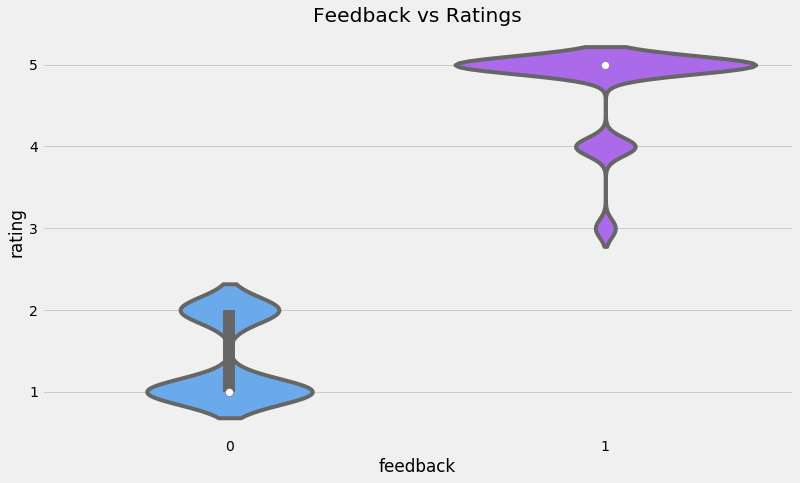

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("Feedback vs Ratings")
plt.show()

>The Bivariate plot above is a violin plot between Feedback and Rating. We can conclude from the graph that the Alexa reviews that have 0 feedback have lower ratings ranging from 1 to 2 stars, but mostly 1 star only. Whereas the Alexa reviews having a feedback equal 1 have higher ratings between 3 to 5 stars. According to the graph, the majority of the feedback reviews was a 5-star rating.

**Length vs Ratings**

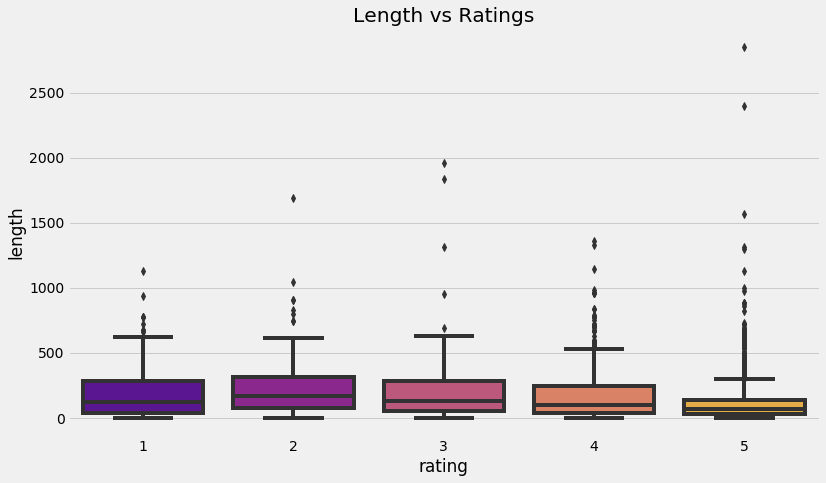

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'plasma')
plt.title("Length vs Ratings")
plt.show()

>The Bivariate plot shows the relationship between length and rating. Here we are looking how long the customer reviews are based on their rating. It is worth noting that all the reviews have pretty similar lengths regardless of their rating. However, there’s a clear difference between the length of low rating reviews and high rating reviews. 
>>According to the graph and as previously mentioned, low rating reviews tend to be longer than high rating reviews. Most of the customers that gave Alexa 5-stars wrote smaller reviews than customers that gave 1 or 2-stars. That might be due to the fact that unsatisfied customers feel the need to explain the reasons for not liking the product. While satisfied customers feel happy, hence do not feel the same urgency to write long reviews.

**Most frequently occuring words - Top 20**

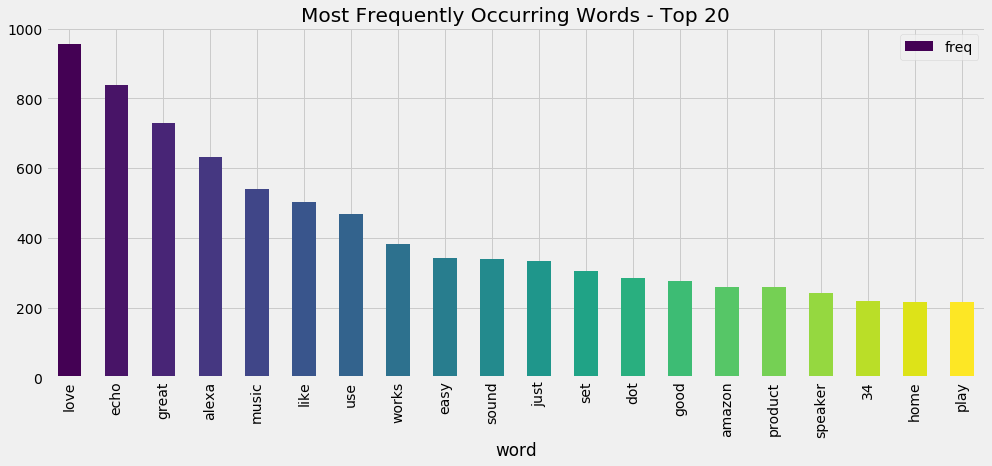

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.viridis(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occurring Words - Top 20")
plt.show()

>The bar plot represents que most frequent words among all of the reviews analyzed from the customers. By looking at the graph, we can have a good idea on how the customers think and feel regarding Amazon’s Alexa.
>>The words “love” and “great” are two of the most frequent words among all of the reviews which suggests that most customers had very positive feelings towards Alexa. This is foreseen since 91.8% (#11) of the reviews had a positive rating. Other frequent words that suggest Alexa is doing well are “amazing”, “like”, “easy”, “works”, and “good”.

**Vocabulary from Reviews**

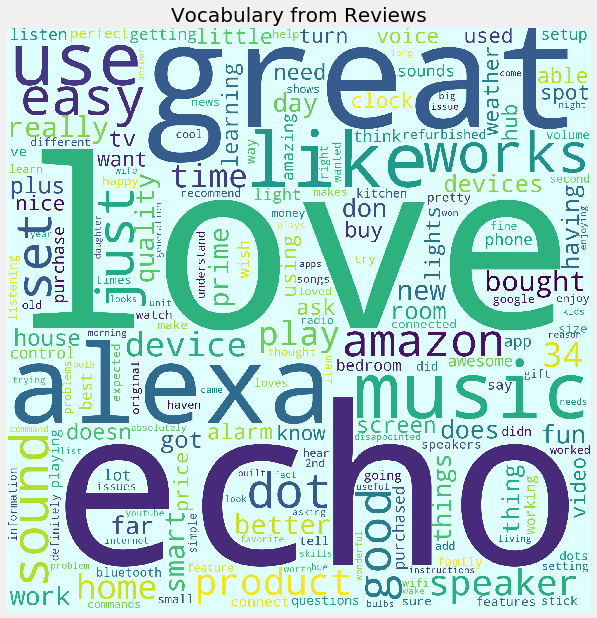

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

>This Word Cloud visualization shows all the most frequently used and most relevant words analyzed from the customer reviews. The bigger the word, the higher is the frequency for that word been written by a customer.
>>As seen in the previous result, “love”, “great”, “like”, are very frequent words written by Alexa customers. This reinforces the customer’s positive feedback towards Alexa.

**Feedback vs Length**

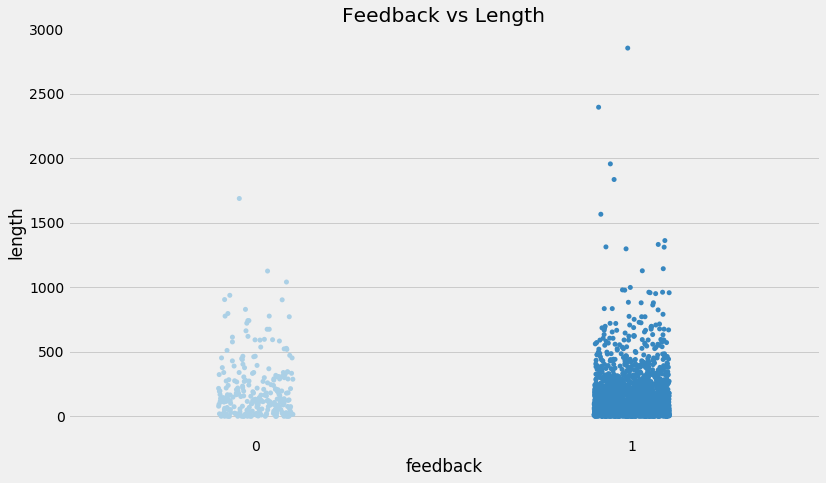

In [19]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.stripplot(data['feedback'], data['length'], palette = 'Blues')
plt.title("Feedback vs Length")
plt.show()

>The Bivariate graph above shows the relationship between feedback and length. We notice that there is a lot more positive feedback than negative feedback. This makes sense since the majority of customers had a positive rating towards Alexa. We also notice that the length of positive feedbacks is greater than the negatives one. This might be due to the total number of positive feedback reviews greatly surpassing the number of negative feedback reviews. 
>>Customers that are satisfied with Alexa wrote longer reviews than customers that did not like Alexa as much.

## 3D Scatter Plot

**Ratings vs Length vs Variation**

In [20]:
trace = go.Scatter3d(
    x = data['length'],
    y = data['rating'],
    z = data['variation'],
    name = 'Amazon Alexa',
    mode='markers',
    marker=dict(
        size=10,
        color = data['rating'],
        colorscale = 'viridis',))

df = [trace]
layout = go.Layout(
    title = 'Length vs Variation vs Ratings',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0))

fig = go.Figure(data = df, layout = layout)
iplot(fig)

>The graph above is a 3-dimension plot exploring the relationships between ratings, length, and variation of Amazon’s Alexa reviews. Each dot in this graph represents a review made by a customer and how that particular review relates to its rating, length and model variation. 

## Spacy

In [21]:
import spacy
nlp = spacy.load('en_core_web_sm')

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent', jupyter=True)

>You may notice that spaCy identifies key words in a sentence and is able to assign meaning to these words. For example, it knows that “Alexa”, “Alexa/Echo/Computer”, “Amazon Music” are organization names instead of the name of a person. It also knows that “every morning” and “a few days” are time and date references.
>>This is useful to identify the key concepts in each sentence and have an idea of what the customer is talking about without actually having to read the entire review.

## Natural Language Processing

**Importing the libraries**

In [22]:
# importing the libraries for Natural Language Processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muril\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Cleaning the text**

In [23]:
# cleaning the text
corpus = []
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

**Creating Bag-of-Words**

In [24]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

**Splitting the dataset into Training and Test set**

In [25]:
# splitting the dataset into Training and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Random Forest**

In [26]:
# Fitting Random Forest classifier with 100 trees to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Predicting results**

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

**Confusion Matrix**

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

**Classification Report**

In [29]:
print(cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 18  36]
 [  0 576]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        54
           1       0.94      1.00      0.97       576

    accuracy                           0.94       630
   macro avg       0.97      0.67      0.73       630
weighted avg       0.95      0.94      0.93       630

0.9428571428571428


<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Amazon_logo.svg" width="500px">